<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Iqbal Asrif"
KELAS = "B"
NPM = "2006473945"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Iqbal Asrif dari kelas B dengan NPM 2006473945, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Iqbal Asrif)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [4]:
mobile_price_data = pd.read_csv('mobile_phone.csv')
mobile_price_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1


In [5]:
mobile_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

In [6]:
mobile_price_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2021.000000,2021.000000,1920.000000,2021.000000,2021.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000,2021.000000,1925.000000,1922.000000,2021.000000
mean,1239.205344,0.492331,1.521302,0.505690,4.303810,0.523998,32.086162,0.501556,140.272143,4.532905,...,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716,0.762494,0.504935,0.506243,1.503216
std,439.916748,0.500065,0.816020,0.500091,4.330382,0.499547,18.198040,0.289261,35.393281,2.291511,...,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042,0.425660,0.500106,0.500091,1.114537
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [8]:
cek_null(mobile_price_data)

              Total   Percent
talk_time        84  0.041564
m_dep            93  0.046017
ram              94  0.046512
touch_screen     96  0.047501
wifi             99  0.048986
clock_speed     101  0.049975
int_memory      106  0.052449


In [9]:
mobile_price_data.duplicated().value_counts()

False    2000
True       21
dtype: int64

In [10]:
import seaborn as sns

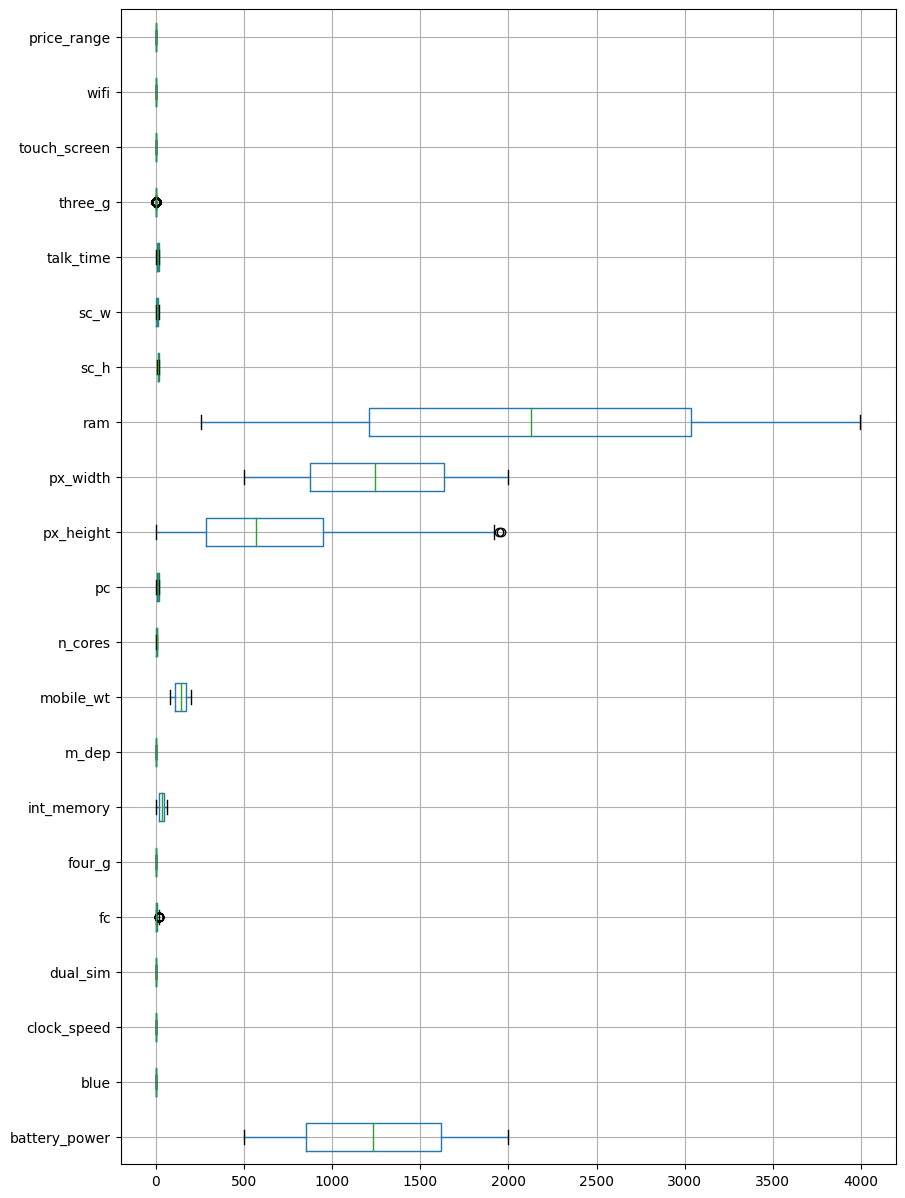

In [11]:
mobile_price_data.boxplot(vert=False,figsize=(10,15))
plt.show()

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

In [12]:
mobile_price_data_cleaned = mobile_price_data.copy()

In [13]:
mobile_price_data_cleaned.drop_duplicates(inplace=True)

In [14]:
mobile_price_data_cleaned.duplicated().value_counts()

False    2000
dtype: int64

In [15]:
for i in ['wifi', 'touch_screen']:
    mobile_price_data_cleaned[i].fillna(mobile_price_data_cleaned[i].mode()[0], inplace=True)

for i in ['talk_time', 'm_dep', 'ram', 'clock_speed', 'int_memory']:
    mobile_price_data_cleaned[i].fillna(mobile_price_data_cleaned[i].median(), inplace=True)

In [16]:
cek_null(mobile_price_data_cleaned)

Tidak ditemukan missing value pada dataset


3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Jawaban: 

> 

In [17]:
mobile_price_data_cleaned[['battery_power', 'px_height', 'px_width', 'ram']].plot(kind='kde', subplots=True, figsize=(10,10));

In [18]:
mobile_price_data_cleaned[['int_memory', 'mobile_wt', 'talk_time']].plot(kind='kde', subplots=True, figsize=(10,10));

In [19]:
mobile_price_data_cleaned[['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep', 'n_cores', 'pc', 'sc_h', 
                    'sc_w', 'three_g', 'touch_screen', 'wifi', 'price_range']].plot(kind='kde', subplots=True, figsize=(10,10));

Adanya nilai outlier, yang tidak terlalu signifikan sehingga tetap disimpan. Akan tetapi nilai outlier tetap penting untuk diobservasi. Oleh karena itu digunakan normalisasi menggunakan MinMaxScaler()

In [20]:
mmc = MinMaxScaler()
cols = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
mobile_price_data_cleaned[cols]  = mmc.fit_transform(mobile_price_data_cleaned[cols])

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

In [21]:
X = mobile_price_data_cleaned.drop('price_range', axis=1)
y = mobile_price_data_cleaned['price_range']
selector_cleaned = SelectKBest(f_classif, k=5)
X = pd.DataFrame(selector_cleaned.fit_transform(X, y), 
            columns=selector_cleaned.get_feature_names_out(input_features=selector_cleaned.feature_names_in_), index=X.index)

5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

In [22]:
input_features_cleaned = selector_cleaned.feature_names_in_
selector_cleaned.get_feature_names_out(input_features=input_features_cleaned)

array(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'],
      dtype=object)

> Jawaban: 

> Fitur tersebut dapat menjelaskan aspek-aspek terpenting dalam sebuah gadget.

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [23]:
kf = KFold(n_splits=10, shuffle=True, random_state=100)

In [24]:
def cross_validation(model, _X, _y, _cv=kf):
    score = cross_val_score(model, X, y, cv=_cv, scoring='accuracy')
    print('Cross Validation Cleaned')
    print(f'Scores for each fold are : {score}')
    print(f'Average score {"{:.2f}".format(score.mean())}')

### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [25]:
dc = DecisionTreeClassifier()
cross_validation(dc, X, y)

Cross Validation Cleaned
Scores for each fold are : [0.835 0.82  0.83  0.805 0.795 0.835 0.81  0.81  0.865 0.775]
Average score 0.82


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [26]:
dc2 = DecisionTreeClassifier(min_samples_leaf=50)
cross_validation(dc2, X, y)

Cross Validation Cleaned
Scores for each fold are : [0.715 0.78  0.805 0.755 0.815 0.755 0.805 0.735 0.795 0.74 ]
Average score 0.77


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Jawaban pada nomor 7 memiliki akurasi yang lebih baik dikarenakan adanya min_samples_split=50 pada nomor 8 yang berarti minimal terdapat 50 data pada suatu node sebelum node tersebut dapat membelah diri. Oleh karena itu, akan ada kumpulan data yang sebenarnya kurang terhubung satu sama lain namun dikelompokkan dalam satu node yang sama karena jumlah dalam node tersebut belum mencapai 50

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [27]:
param_grid = {'criterion': ["gini", "entropy", "log_boss"],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50, 60, 70],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, None]}
dc3 = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dc3, param_grid=param_grid)
clf.fit(X, y)

c:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2200 fits failed out of a total of 6600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_boss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,
                                       25, 30, 35, 40, 45, 50, 55, 60, 70,
                                       None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 20, 30, 40, 50,
                                               60, 70]})

In [28]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 60, 'min_samples_split': 2}

In [29]:
clf.best_score_

0.8295

### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [30]:
rf = RandomForestClassifier()
cross_validation(rf, X, y)

Cross Validation Cleaned
Scores for each fold are : [0.845 0.875 0.89  0.885 0.855 0.875 0.9   0.91  0.885 0.855]
Average score 0.88


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [40]:
param_grid = {'criterion': ["gini", "entropy", "log_loss"],
                'n_estimators':[100], 'min_samples_split':[i for i in range(2,15)],
                'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None]}

rf2 = RandomForestClassifier()
clf = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5)
clf.fit(X,y)

KeyboardInterrupt: 

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Criterion pada no 12 mencakup "gini", "entropy" dan "log_loss" sedangkan pada no 11 hanya "gini". min_samples_split pada no 11 hanya bernilai 2. Semakin banyak kemungkinan yang dicoba maka kemungkinan hasil yang dihasilkan akan semakin baik.

### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [32]:
nb = GaussianNB()
cross_validation(nb, X, y)

Cross Validation Cleaned
Scores for each fold are : [0.755 0.76  0.79  0.76  0.82  0.79  0.78  0.8   0.79  0.75 ]
Average score 0.78


15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban:

> Karena data memiliki persebaran normal

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban:

> Bisa menggunakan salah satu variasi algoritma saja, namun hasil akhir akan kurang akurat karena algoritma naive bayes yang digunakan tidak dapat mengakomodasi keseluruhan data. Oleh karena itu, dapat diasumsikan di awal bahwa data independen lalu digunakan algoritma naive bayes yang sesuai untuk masing-masing data terlebih dahulu. Nilai probabilitas yang dihasilkan naive bayes lalu dihitung berdasarkan rumus probabilitas yang ada. 

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [34]:
kn = KNeighborsClassifier(n_neighbors=3)
cross_validation(kn, X, y)

Cross Validation Cleaned
Scores for each fold are : [0.78  0.78  0.8   0.735 0.805 0.795 0.795 0.79  0.815 0.78 ]
Average score 0.79


18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [36]:
param_grid = {'n_neighbors': [i for i in range(1,10)]}
kn2 = KNeighborsClassifier()
clf = GridSearchCV(estimator=kn2, param_grid=param_grid, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [37]:
clf.best_params_

{'n_neighbors': 9}

In [38]:
clf.best_score_

0.8239999999999998

### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban:

> Naive bayes memiliki performa terbaik. Karena menurut saya, performa tidak hanya diukur berdasarkan nilai prediksi namun juga berdasarkan runtime. Dengan nilai prediksi yang tidak berbeda jauh, namun waktu eksekusi yang berbeda jauh maka menurut saya model naive bayes adalah yang terbaik.